# 머신러닝 데이터 분석

--------------------------------------------------

## 1. 머신러닝 개요

### 1. 머신 러닝이란?

기계(컴퓨터 알고리즘) 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정

### 2. 지도 학습 vs 비지도 학습

+ 지도 학습(supervised learning) : 정답 데이터를 다른 데이터와 함계 컴퓨터 알고리즘에 입력하는 방식

+ 비지도 학습(unsupervised learning) : 정답 데이터 없이 컴퓨터 알고리즘 스스로 데이터로부터 숨은 패턴을 찾아내는 방식

구분 | 지도 학습 (supervised learning) | 비지도 학습 (unsupervised learning)
-----|--------------------------------|------------------------
알고리즘(분석모형) | • 회귀분석 | • 군집분석
&nbsp;|• 분류|&nbsp;
특징|• 정답을 알고 있는 상태에서 학습|• 정답이 없는 상태에서 서로 비슷한 데이터를 찾아서 그룹화
&nbsp;|• 모형 평가 방법이 다양한 편|• 모형 평가 방법이 제한적

### 3. 머신러닝 프로세스


데이터 정리 : 판다스를 이용하여 데이터프레임의 열에 속성을 나타내는 변수들이 위치하도록 하고 데이터프레임의 행은 하나의 관측값을 나타낼 수 있도록 한다. 

⬇️

데이터 분리 : 모형 학습에 사용하는 훈련 데이터(traning data)와 학습을 마친 모형의 예측 능력을 평가하기 위한 검증데이터(test data)로 분리한다.

⬇️

알고리즘 준비

⬇️

모형 학습 : 훈련 데이터를 사용하여 모형 학습

⬇️

예측 : 검증 데이터를 사용하여 예측

⬇️

모형 평가 : 검증 데이터로 모형의 예측 능력 평가하고 평가 결과를 바탕으로 최종 모형을 확정

⬇️

모형 활용 : 최종 모형을 문제 해결에 적용

--------------------------------------------------

## 2. 회귀분석

연속적인 값을 갖는 연속 변수를 예측하는데 주로 활용됨

분석 모형이 예측하고자 하는 값 : 종속(dependent)변수 또는 예측(predictor) 변수

예측을 위해 모형이 사용하는 속성 : 독립(independent)변수 또는 설명(explanatory) 변수

### 1. 단순회귀분석

단순회귀분석(Simple Linear Regression) : 두 변수 사이에 일대일로 대응되는 확률적, 통꼐적 상관성을 찾는 알고리즘

+ Step 1 - 데이터 분석

In [2]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv(r"C:\Users\구남이\Downloads\5674-833_4th\part7\auto-mpg.csv", header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
print(df.head())   

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  




+ Step 2 - 데이터 탐색

info() 메소드와 describe() 메소드를 실행하여 데이터에 대한 기본적인 정보 확인

In [3]:
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# horsepower 열의 자료형 변경 (문자열 -> 숫자)
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print(df.describe())                                     # 데이터 통계 요약정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

+ Step 3 - 속성 선택

단숙회귀분석에 변수로 사용할 후보 열 선택

In [4]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


단순회귀분석에 사용할 독립 변수를 선택하기 위해 산점도를 그려 두 변수 간에 선형관계가 있는 변수를 찾는다.

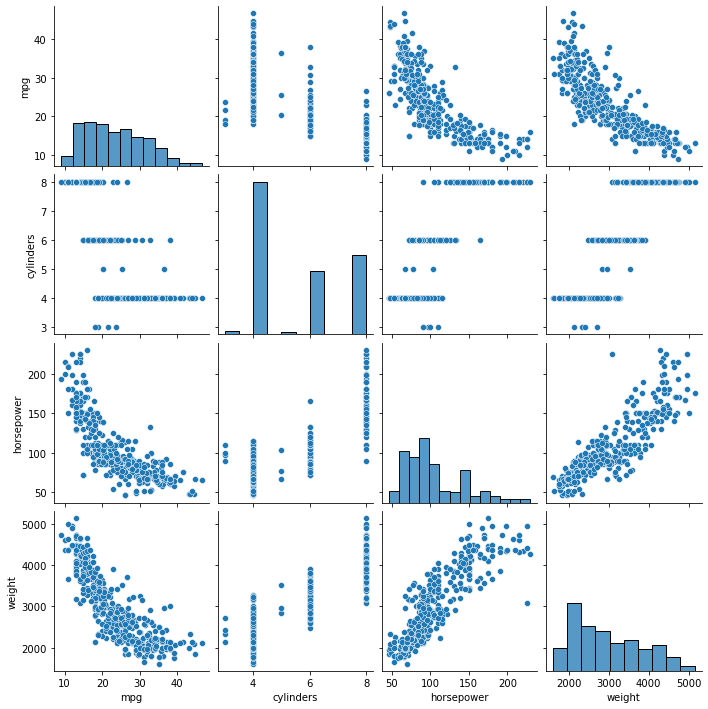

In [6]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수에 대하여 그래프로 나타내기
sns.pairplot(ndf)  

+ Step 4 - 훈련/검증 데이터 분할

훈련 데이터와 검증 데이터로 나눠서 모형을 구축한다. 


train_test_spilt 옵션 | 설명
----------------------|-----------
test_size | 테스트 셋 구성의 비율 (train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정)
shuffle(default=True) | 데이터 분리 전에 데이터를 무작위로 섞을지 여부
stratify (default=None) | 분류분석을 할 때 중요한 옵션값, stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지
random_state | 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값

In [7]:
# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


+ Step 5 - 모형 학습 및 검증

sklearn 라이브러리에서 선형회귀분석 모듈을 사용

In [8]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [9]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)

기울기 a:  [-0.00775343]


In [14]:
# 회귀식의 y절편
print('y절편 b: ', lr.intercept_)

y절편 b:  46.710366257280086


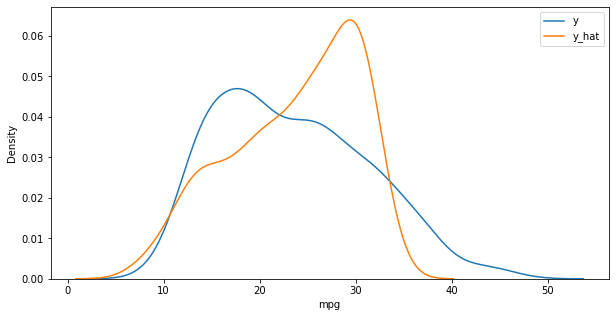

In [13]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

### 2. 다항회귀분석

다항회귀분석 : 2차함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘

+ 데이터 준비

In [15]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv(r"C:\Users\구남이\Downloads\5674-833_4th\part7\auto-mpg.csv", header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


+ 모형 학습 및 검증

sklearn 라이브러리에서 선형회귀분석을 위한 LinearRegression() 함수와 다항식 변환을 위한 polynomialFeatures() 함수를 불러온다.

In [16]:
# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [17]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)

0.7087009262975685


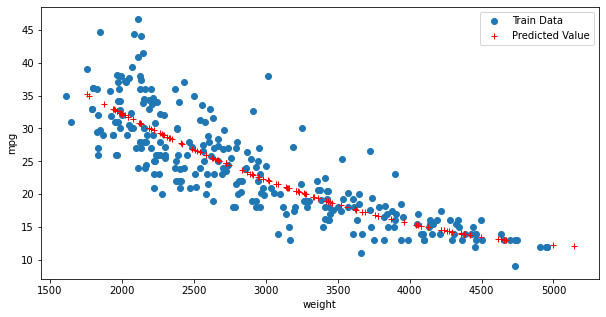

In [18]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()


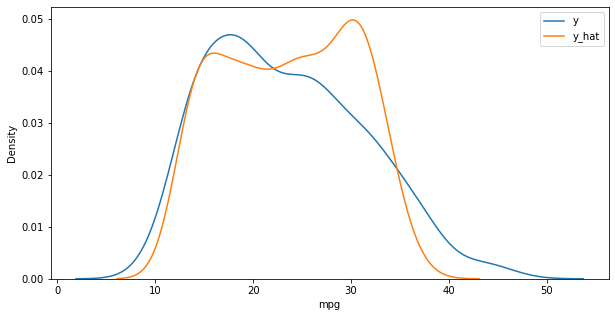

In [19]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

### 3. 다중회귀분석

여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우 다중회귀분석 이용

+ 데이터 준비

In [30]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv(r"C:\Users\구남이\Downloads\5674-833_4th\part7\auto-mpg.csv", header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


+ 모형 학습 및 검증

In [31]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.698117543970238


In [32]:
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

X 변수의 계수 a:  [-0.00297356 -0.04651339 -0.00297356]


In [33]:
# 회귀식의 y절편
print('상수항 b : ', lr.intercept_)

상수항 b :  46.22498988019804


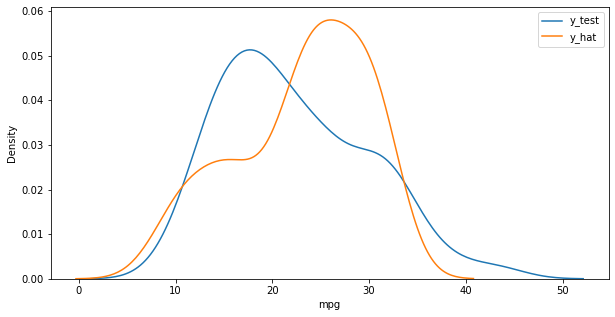

In [34]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

--------------------------------------------------

## 3. 분류

분류 알고리즘 : 대상의 속성(설명 변수)을 입력 받고, 목표 변수가 갖고 있는 카테고리(범주형) 값 중에서 어느 한 값으로 분류하여 예측

### 1. KNN ( K-Nearest-Neighbors)

새로운 관측값이 주어지면 기존 데이터 중에서 가장 속성이 비슷한 k개의 이웃을 먼저 찾고 가까운 이웃들이 갖고 있는 목표 값과 같은 값으로 분류하여 예측한다.
k값에 따라 예측의 정확도가 달라지므로, 적절한 k값을 찾는 것이 중요하다.

+ Step 1 - 데이터 준비

In [35]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# 데이터 살펴보기
print(df.head()) 

   survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
0         0       3    male  22.0      1  ...        True   NaN  Southampton   
1         1       1  female  38.0      1  ...       False     C    Cherbourg   
2         1       3  female  26.0      0  ...       False   NaN  Southampton   
3         1       1  female  35.0      1  ...       False     C  Southampton   
4         0       3    male  35.0      0  ...        True   NaN  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  

[5 rows x 15 columns]


+ Step 2 - 데이터 탐색

In [36]:
# 데이터 자료형 확인
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [37]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [38]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))

714


In [40]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

S


          survived      pclass   sex         age       sibsp  ...  class  who  \
count   714.000000  714.000000   714  714.000000  714.000000  ...    714  714   
unique         NaN         NaN     2         NaN         NaN  ...      3    3   
top            NaN         NaN  male         NaN         NaN  ...  Third  man   
freq           NaN         NaN   453         NaN         NaN  ...    355  413   
mean      0.406162    2.236695   NaN   29.699118    0.512605  ...    NaN  NaN   
std       0.491460    0.838250   NaN   14.526497    0.929783  ...    NaN  NaN   
min       0.000000    1.000000   NaN    0.420000    0.000000  ...    NaN  NaN   
25%       0.000000    1.000000   NaN   20.125000    0.000000  ...    NaN  NaN   
50%       0.000000    2.000000   NaN   28.000000    0.000000  ...    NaN  NaN   
75%       1.000000    3.000000   NaN   38.000000    1.000000  ...    NaN  NaN   
max       1.000000    3.000000   NaN   80.000000    5.000000  ...    NaN  NaN   

       adult_male alive

+ Step 3 - 속성 선택

변수로 사용할 후보 열 선택

In [41]:
# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())  

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


KNN 모형에 적용하기 위해 범주형 데이터를 숫자형으로 변환한다. 이 과정을 더미 변수 만들기 또는 원핫인코딩(one-hot-encoding)이라고 부른다.

In [42]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())   

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


+ Step 4 - 훈련/검증 데이터 분할

In [43]:
# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


+ Step 5 - 모형 학습 및 검증

sklearn 라이브러리의 neighbors 모듈 사용

In [44]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [45]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

[[109  16]
 [ 25  65]]


In [46]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



> 분류 모형의 예측력을 평가하는 지표
>
> 1. Confusion Matrix
> 
> ![혼동행렬](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdGmqHy%2FbtqWX4EL9Ne%2FuZeK9C5sOC6YzozhjBRFFK%2Fimg.png)
>
> 2. Percision
>
> True로 예측한 분석대상 중에서 실제 값이 True인 비율, 모형의 정확성을 나타냄
>
> ![percision](https://t1.daumcdn.net/cfile/tistory/999073395B64165D01)
>
> 3. Recall
>
> 실제 값이 True인 분석대상 중에서 True로 예측하여 모형이 적중한 비율, 재현율이 높다 = 실제 True를 False로 잘못 예측할 확률이 낮다.
>
> ![recall](https://t1.daumcdn.net/cfile/tistory/998737375B64173C2C)
>
> 4. F1-score
>
> 정확도와 재현율이 균등하게 반영될 수 있도록 정확도와 재현율의 조화 평균을 계산한 값
>
> ![F1-score](https://t1.daumcdn.net/cfile/tistory/99B177405B64193405)

### 2. SVM ( Support Vector Machine)

SVM 모형은 벡터 공간에 위치한 훈련 데이터의 좌표와 각 데이터가 어떤 분류 값을 가져야 하는지 정답을 입력 받아서 학습한다. 

![SVM](https://lh3.googleusercontent.com/-5AjAiu_n8Ls/YAw3t6TTazI/AAAAAAAAAMA/FPi8GZVVCR0-CF837JwnpvV8bcWhtui1QCLcBGAsYHQ/image.png)

같은 분류 값을 갖는 데이터끼리 같은 공간에 위치하도록 베터 공간을 여러 조각으로 나눌 수 있다면 새로운 데이터에 대해서도 어느 공간에 위치하는지 분류할 수 있다.

+ 데이터 준비

In [1]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


+ 모형 학습 및 검증

sklearn에서 가져온 svm 모듈의 svc() 함수 사용

In [2]:
'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


+ 모형 성능 평가

In [3]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



### 3. Decision Tree

![DecisionTree](https://t1.daumcdn.net/cfile/tistory/99E5BB4E5E9E7C9425)

각 분기점마다 목표 값을 가장 잘 분류할 수 있는 속성을 찾아서 배치하고, 해당 속성이 갖는 값을 이용하여 새로운 가지를 만든다. Entropy(다른 종류의 값들이 섞여 있는 정도를 나타내는 지표)가 일정 수준 이하로 낮아질 때까지 반복한다.

+ 데이터 준비

In [5]:
# 기본 라이브러리 불러오기
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())
print('\n')

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   cl

In [6]:
# bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
# bare_nuclei 열의 고유값 확인
print(df['bare_nuclei'].unique())
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')       # 문자열을 정수형으로 변환

print(df.describe())                                      # 데이터 통계 요약정보 확인

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.

In [7]:
'''
[Step 3] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X = df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
        'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']]  # 설명 변수 X
y = df['class']  # 예측 변수 Y

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (478, 9)
test data 개수:  (205, 9)


+ 모형 학습 및 검증

Sklearn 라이브러리의 tree 모듈에서 DescisionTreeClassifier() 사용

In [9]:
'''
[Step 4] Decision Tree 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기

# 모형 객체 생성 (criterion='entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
y_hat = tree_model.predict(X_test)      # 2: benign(양성), 4: malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


+ 모형 평가 지표 계산 

In [10]:
# 모형 성능 평가 - Confusion Matrix 계산
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)


[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



---------------
## 4. 군집

군집 분석 : 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터로 묶는 알고리즘, 관측값이 어떤 집단에 속해있는 지 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단하는 점에서 분류 알고리즉뫄 차이가 있다.

### 1. K-Means

K-Means 알고리즘 : 데이터간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용한다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 때 클러스터의 중심까지 거리가

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;가장 가까운 클러스터로 해당 데이터를 할당한다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;몇 개의 클러스터로 데이터를 구분할 것인지를 결정하는 k 값에 따라 모형의 성능이 달라진다.

+ 데이터 준비

In [29]:
### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

In [30]:
# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


+ 모형 학습 및 검증

sklearn 라이브러리의 cluster 모듈 활용, Kmeans() 함수 사용

In [31]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)   

# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   

[1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 4 1 1 2 2 1 2 2 2 2 2 2 1 2
 1 1 2 2 2 1 1 1 1 1 3 1 1 2 2 1 1 2 2 3 1 2 2 1 3 1 1 2 3 2 1 2 2 2 4 2 1
 1 2 2 1 2 2 2 1 1 2 1 3 3 4 2 2 2 2 3 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 4 2 4 2
 2 2 2 1 1 2 2 2 1 2 2 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 3 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 4 0 0 0 0 0 1 0
 3 0 1 0 0 0 0 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 1 1 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

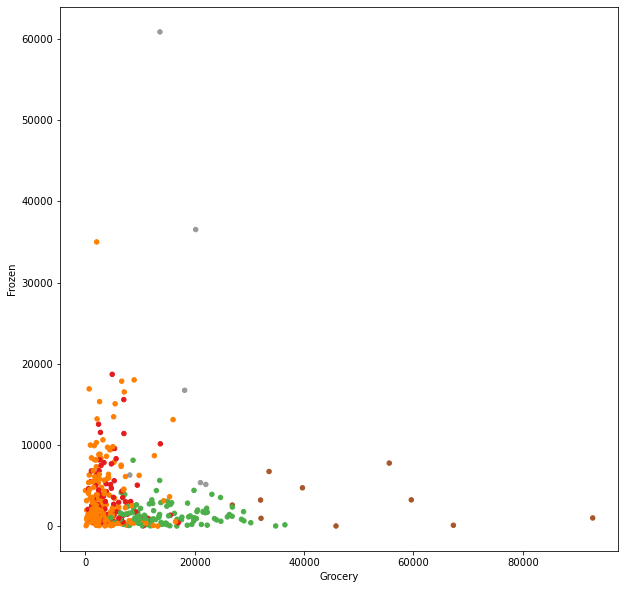

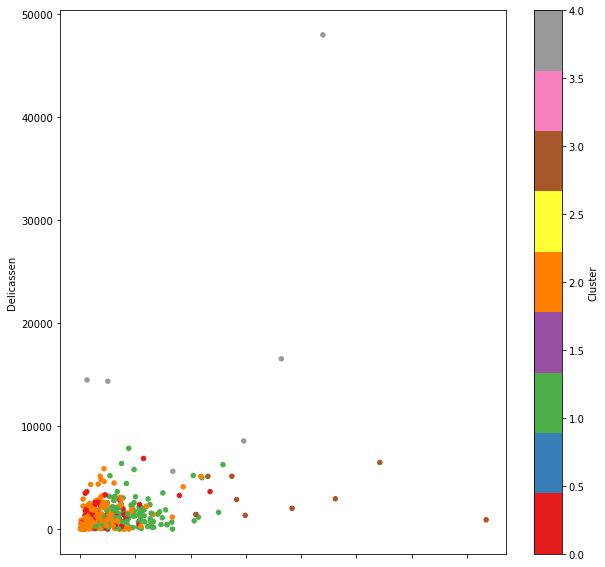

In [35]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

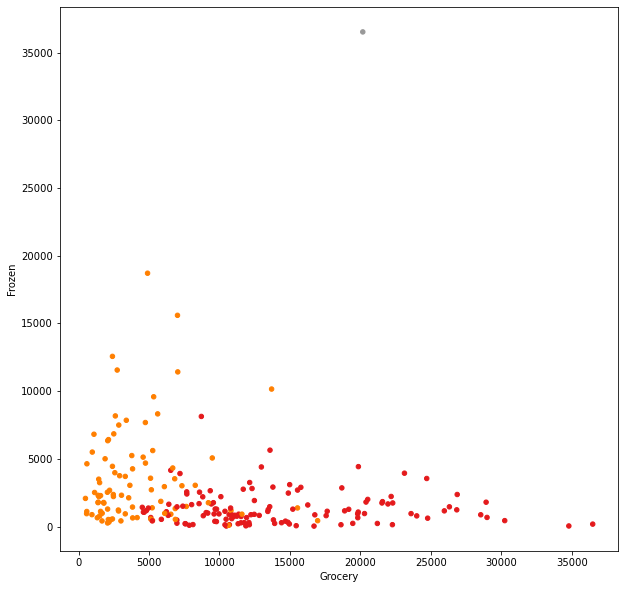

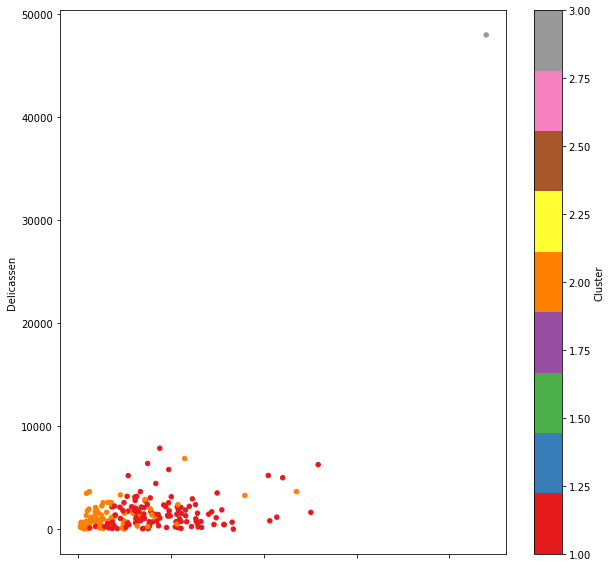

In [15]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

### 2. DBSCAN(Density - Based Spatial clustering of Applications with Noise)

DBSCAN은 데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터를 구분한다. 

![DBSCAN](https://miro.medium.com/max/1400/0*PAMQWOmks-QDe5jB.PNG)

+ 데이터 준비

In [38]:
### 기본 라이브러리 불러오기
import pandas as pd
import folium


'''
[Step 1] 데이터 준비/ 기본 설정
'''

# 서울시내 중학교 진학률 데이터셋 (출처: 교육???)
file_path = r"C:\Users\구남이\Downloads\5674-833_4th\part7\2016_middle_shcool_graduates_report.xlsx"
df = pd.read_excel(file_path, engine='openpyxl', header=0)

# 열 이름 배열을 출력
print(df.columns.values)   

['Unnamed: 0' '지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고'
 '외고_국제고' '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']


In [39]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())

   Unnamed: 0   지역               학교명  코드  유형  주야  남학생수  ...    자사고    자공고  \
0           0  성북구    서울대학교사범대학부설중학교   3  국립  주간   277  ...  0.227  0.000   
1           1  종로구  서울대학교사범대학부설여자중학교   3  국립  주간     0  ...  0.043  0.004   
2           2  강남구             개원중학교   3  공립  주간   170  ...  0.090  0.003   
3           3  강남구             개포중학교   3  공립  주간    83  ...  0.065  0.000   
4           4  서초구             경원중학교   3  공립  주간   199  ...  0.282  0.000   

    기타진학  취업     미상         위도          경도  
0  0.004   0  0.000  37.594942  127.038909  
1  0.031   0  0.000  37.577473  127.003857  
2  0.009   0  0.003  37.491637  127.071744  
3  0.019   0  0.000  37.480439  127.062201  
4  0.010   0  0.000  37.510750  127.008900  

[5 rows x 21 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역       

In [43]:
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 중학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=5,              # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7,      # 투명도    
                        popup=name
    ).add_to(mschool_map)
    
mschool_map

In [44]:
'''
[Step 3] 데이터 전처리
'''

# 원핫인코딩(더미 변수)
from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder()     # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())   

   Unnamed: 0   지역               학교명  코드  유형  주야  남학생수  ...     미상         위도  \
0           0  성북구    서울대학교사범대학부설중학교   3  국립  주간   277  ...  0.000  37.594942   
1           1  종로구  서울대학교사범대학부설여자중학교   3  국립  주간     0  ...  0.000  37.577473   
2           2  강남구             개원중학교   3  공립  주간   170  ...  0.003  37.491637   
3           3  강남구             개포중학교   3  공립  주간    83  ...  0.000  37.480439   
4           4  서초구             경원중학교   3  공립  주간   199  ...  0.000  37.510750   

           경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 25 columns]


+ 모형 학습 및 검증

In [49]:
'''
[Step 4] DBSCAN 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기 
from sklearn import cluster

# 분석에 사용할 속성을 선택 (과학고, 외고국제고, 자사고 진학률)
columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X)   
 
# 예측 (군집) 
cluster_label = dbm.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())  

    특성화고    과학고  마이스터고
0  0.148  0.018  0.011
1  0.199  0.000  0.000
2  0.047  0.009  0.006
3  0.097  0.013  0.019
4  0.017  0.007  0.000


[-1  0 -1 -1  1  5 -1 -1  2 -1 -1 -1  2  0 -1 -1 -1 -1 -1  2 -1 -1 -1  0
  1  2 -1  1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  3
 -1 -1 -1  3 -1  1 -1 -1  4 -1 -1  4 -1 -1  4  0 -1  5  0  6  1 -1  0  1
 -1  0  8 -1 -1 -1  4 -1  3 -1 -1  3  4 -1 -1 -1  3 -1  0  2 -1  0 -1 -1
  5  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1
 -1 -1  5  8  0 -1 -1 -1 -1 -1  7  3  0 -1  5  0  4 -1  5 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1  8  4 -1 -1  6 -1 -1 -1 -1 -1  0  6 -1 -1 -1 -1 -1 -1  6
 -1 -1  7 -1 -1  6 -1  0  0 -1  3 -1  6  8 -1  6 -1 -1 -1 -1 -1 -1  5  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  6  0 -1 -1 -1 -1 -1  4 -1 -1  3 -1 -1
  0 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  9  0
  9 -1 -1 -1 -1  5  0 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0  4 -1 -1  0
 -1 -1  0  0 -1 -1  6  3 -1  6 -1 -1 -1  0 -1  0 10 -1  0

In [51]:
# 클러스터 값으로 그룹화하고, 그룹별로 내용 출력 (첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped_cols].head())

* key : -1
* number : 234
   Unnamed: 0   지역  코드   특성화고    과학고  마이스터고
0           0  성북구   3  0.148  0.018  0.011
2           2  강남구   3  0.047  0.009  0.006
3           3  강남구   3  0.097  0.013  0.019
6           6  강남구   3  0.015  0.015  0.000
7           7  강남구   3  0.000  0.032  0.000


* key : 0
* number : 70
    Unnamed: 0   지역  코드   특성화고  과학고  마이스터고
1            1  종로구   3  0.199  0.0    0.0
13          13  서초구   3  0.032  0.0    0.0
23          23  강남구   3  0.025  0.0    0.0
28          28  서초구   3  0.040  0.0    0.0
29          29  강남구   3  0.051  0.0    0.0


* key : 1
* number : 7
    Unnamed: 0   지역  코드   특성화고    과학고  마이스터고
4            4  서초구   3  0.017  0.007    0.0
24          24  강남구   3  0.026  0.007    0.0
27          27  강남구   3  0.006  0.006    0.0
53          53  강동구   3  0.020  0.007    0.0
68          68  송파구   3  0.011  0.007    0.0


* key : 2
* number : 6
    Unnamed: 0   지역  코드   특성화고    과학고  마이스터고
8            8  강남구   3  0.018  0.013    0.0
12          12  

In [61]:
# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'tan'}

cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster_map)

In [62]:
cluster_map

In [63]:
# X2 데이터셋에 대하여 위의 과정을 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')


X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)  
df['Cluster2'] = dbm2.labels_   

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped2_cols].head())

    특성화고    과학고  마이스터고  code
0  0.148  0.018  0.011     0
1  0.199  0.000  0.000     0
2  0.047  0.009  0.006     0
3  0.097  0.013  0.019     0
4  0.017  0.007  0.000     0


* key : -1
* number : 238
   Unnamed: 0   지역  코드   특성화고    과학고  마이스터고  code
0           0  성북구   3  0.148  0.018  0.011     0
2           2  강남구   3  0.047  0.009  0.006     0
3           3  강남구   3  0.097  0.013  0.019     0
6           6  강남구   3  0.015  0.015  0.000     0
7           7  강남구   3  0.000  0.032  0.000     0
* key : 0
* number : 70
    Unnamed: 0   지역  코드   특성화고  과학고  마이스터고  code
1            1  종로구   3  0.199  0.0    0.0     0
13          13  서초구   3  0.032  0.0    0.0     0
23          23  강남구   3  0.025  0.0    0.0     0
28          28  서초구   3  0.040  0.0    0.0     0
29          29  강남구   3  0.051  0.0    0.0     0
* key : 1
* number : 7
    Unnamed: 0   지역  코드   특성화고    과학고  마이스터고  code
4            4  서초구   3  0.017  0.007    0.0     0
24          24  강남구   3  0.026  0.007    0.0     0
27  

In [68]:
cluster2_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster2_map)
    
cluster2_map

In [69]:
# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3 = [9, 10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)  
df['Cluster3'] = dbm3.labels_   

grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped3_cols].head())

    특성화고    과학고
0  0.148  0.018
1  0.199  0.000
2  0.047  0.009
3  0.097  0.013
4  0.017  0.007


* key : -1
* number : 73
    Unnamed: 0   지역  코드   특성화고    과학고
0            0  성북구   3  0.148  0.018
3            3  강남구   3  0.097  0.013
6            6  강남구   3  0.015  0.015
7            7  강남구   3  0.000  0.032
10          10  강남구   3  0.000  0.031
* key : 0
* number : 205
    Unnamed: 0   지역  코드   특성화고  과학고
1            1  종로구   3  0.199  0.0
13          13  서초구   3  0.032  0.0
22          22  강남구   3  0.158  0.0
23          23  강남구   3  0.025  0.0
28          28  서초구   3  0.040  0.0
* key : 1
* number : 104
    Unnamed: 0   지역  코드   특성화고    과학고
2            2  강남구   3  0.047  0.009
5            5  강남구   3  0.066  0.007
11          11  강남구   3  0.064  0.007
15          15  서초구   3  0.046  0.009
32          32  서초구   3  0.131  0.003
* key : 2
* number : 11
    Unnamed: 0   지역  코드   특성화고    과학고
4            4  서초구   3  0.017  0.007
9            9  강남구   3  0.000  0.006
24          24  강

In [71]:
cluster3_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster3_map)
    
cluster3_map